# Importing Libraies

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics  
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')


# Getting Data

In [2]:
mpg=pd.read_csv('auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Above we can observe The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

# Data Preprocessing 

In [3]:
mpg.columns=['Mpg','Cylinders','Displacement','Horsepower','Weight','Accleration','Model_year','Origin','Car_name']

In [4]:
mpg.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Accleration,Model_year,Origin,Car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


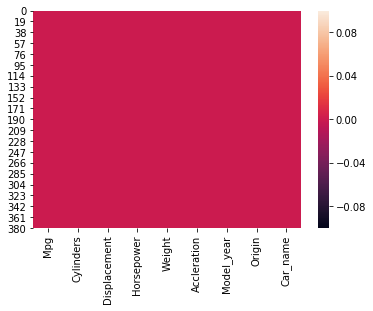

In [5]:
#check null data
sns.heatmap(mpg.isnull())

It's clear that there is no null data is present in this data .

# Statisticsl Description

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
Mpg             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null object
Weight          398 non-null int64
Accleration     398 non-null float64
Model_year      398 non-null int64
Origin          398 non-null int64
Car_name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


here we can observe that only Car_name,horsepower is in object format and accleration,mpg,displacement is in float toher than theseall other are in integer format.

In [7]:
mpg.describe()

,Mpg,Cylinders,Displacement,Weight,Accleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


>Here we can observe that minimum mpg is 9 and maximum mpg is 46.6 .
>Here we can observe that minimum weight is 1613 and maximum weight is 5140 and here you can observe other one is there is alot of difference between 75% and 100% in the sense it contains outliers .
>

# Exploratory Data Analysis

### Maximum cars how many cylinders they carry ?

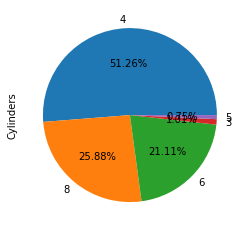

In [8]:
mpg['Cylinders'].value_counts().plot.pie(autopct="%2.2f%%")

Maximum number of cars are carried cylinders at 4.

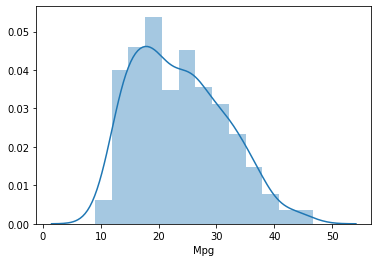

In [9]:
sns.distplot(mpg['Mpg'])

From here we can observe that the data is moderately skewed to the right. This implies that the there are more number of cars which have low mpg than those with high mpg.

Text(0.5, 1.0, 'Origin')

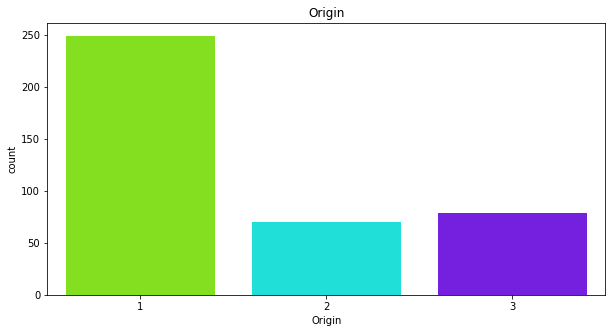

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(mpg['Origin'],palette='hsv')
plt.title("Origin")

Here we can observe that the origin count for one is 250 it is more compare to all other two origins.

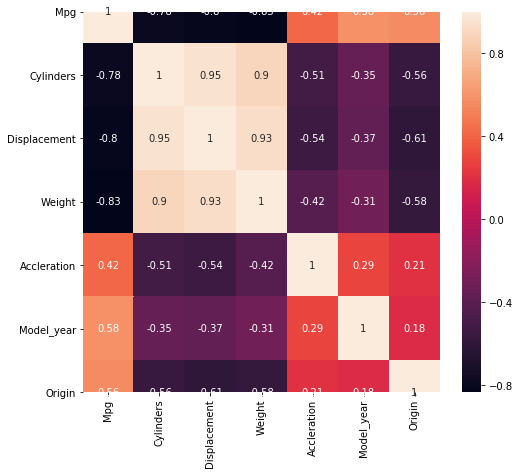

In [11]:
#to check Cor-relation
corr_hmap=mpg.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Mpg is highly negatively cor-relate Weight,Displacement,Cylinders.And highly positively cor-relate with origin,Model_year,Accleration.

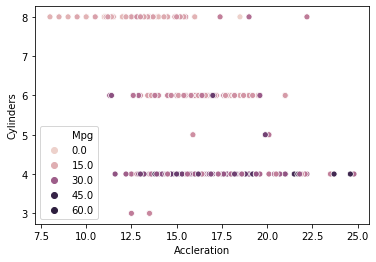

In [12]:
sns.scatterplot(x='Accleration',y='Cylinders',hue='Mpg',data =mpg)

Here we can observe that cylinders is 4 and accleration good and Mpg also well.But if cylinders are 8 and 6 accleration going to decrease and mpg is worst it's not good.

from here we can observe that car_name is text data and it contain different carnames if we implement encoding techniques we get more number
of rows more than normal so it's better to drop this column.

In [13]:
mpg.drop(['Car_name','Horsepower'],inplace=True,axis=1)

# Check Dsitribution of Skewness

In [14]:
mpg.skew()

Mpg             0.457066
Cylinders       0.526922
Displacement    0.719645
Weight          0.531063
Accleration     0.278777
Model_year      0.011535
Origin          0.923776
dtype: float64

There is a skewness present in this dataset and need to remove this skewness.

In [15]:
collist=mpg.columns
ncol=9
nrows=7

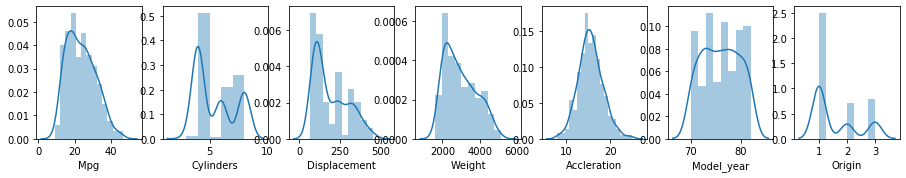

In [16]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(mpg[collist[i]])

In [17]:
x=mpg.iloc[:,1:]
x.head()

,Cylinders,Displacement,Weight,Accleration,Model_year,Origin
0,8,307.0,3504,12.0,70,1
1,8,350.0,3693,11.5,70,1
2,8,318.0,3436,11.0,70,1
3,8,304.0,3433,12.0,70,1
4,8,302.0,3449,10.5,70,1


In [18]:
y=mpg.iloc[:,:1]
y.head()

,Mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [19]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [20]:
x.skew()

Cylinders       0.526922
Displacement    0.228886
Weight          0.531063
Accleration     0.278777
Model_year      0.011535
Origin          0.796540
dtype: float64

Origin still has skewness.

# Buliding a MachineLearning Model

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [22]:
x_train.shape

(358, 6)

In [23]:
y_train.shape

(358, 1)

In [24]:
x_test.shape

(40, 6)

In [25]:
y_test.shape

(40, 1)

In [26]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [27]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [28]:
lr=LinearRegression(normalize=True)
rg=RidgeCV()
rfr=RandomForestRegressor()

In [29]:
#prepare models
seed=7
models=[]
models.append(('LinearRegression',lr))
models.append(('RidgeCV',rg))
models.append(('RandomForestRegressor',rfr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
r2score=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    cv=cross_val_score(model,x,y,cv=10).mean()
    print('cross_val_score',cv)
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    r2score.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.8245909609183103


cross_val_score 0.6311573286407441
Performance Measures:
MAE 2.4463293774943566
MSE 10.193883638362914
RMSE 3.1927861873860133
R-square 0.8338292700006605
*********************** RidgeCV ************


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)


score 0.8245658485449341


cross_val_score 0.6336792537951558
Performance Measures:
MAE 2.444166221939126
MSE 10.183322976211779
RMSE 3.1911319271085894
R-square 0.8340014195955732
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples

In [30]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':r2score},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,82.459096,2.446329,10.193884,3.192786,0.833829
1,RidgeCV,82.456585,2.444166,10.183323,3.191132,0.834001
2,RandomForestRegressor,97.309656,1.745500,5.277890,2.297366,0.913965


# Predicting Data

In [31]:
pred=rfr.predict(x_test)
print("predicted wins",pred)
print("actual wins",y_test)

predicted wins [31.25 28.21 21.3  14.61 13.7  27.66 27.42 13.2  17.42 20.88 14.2  35.13
 28.9  21.51 23.52 12.8  29.88 21.07 15.55 37.05 22.1  20.53 22.28 31.94
 21.46 40.66 26.63 24.1  20.2  12.9  28.03 33.65 19.7  25.7  36.47 13.85
 22.16 21.83 14.55 27.96]
actual wins       Mpg
198  33.0
396  28.0
33   19.0
208  13.0
93   14.0
84   27.0
373  24.0
94   13.0
222  17.0
126  21.0
9    15.0
383  38.0
56   26.0
72   15.0
132  25.0
42   12.0
370  31.0
275  17.0
229  16.0
377  31.0
77   22.0
15   22.0
389  22.0
238  33.5
0    18.0
394  44.0
114  26.0
234  24.5
261  18.1
104  12.0
393  27.0
375  36.0
298  23.0
57   24.0
312  37.2
116  16.0
113  21.0
262  19.2
158  16.0
141  29.0


# Saving Model

In [32]:
mpg_new=pd.DataFrame(pred)
mpg_new.to_csv('rfr_mpg.csv')

In [33]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'mpg_new.obj')
#load the model from a file
rfr_from_joblib=joblib.load('mpg_new.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([31.25, 28.21, 21.3 , 14.61, 13.7 , 27.66, 27.42, 13.2 , 17.42,
       20.88, 14.2 , 35.13, 28.9 , 21.51, 23.52, 12.8 , 29.88, 21.07,
       15.55, 37.05, 22.1 , 20.53, 22.28, 31.94, 21.46, 40.66, 26.63,
       24.1 , 20.2 , 12.9 , 28.03, 33.65, 19.7 , 25.7 , 36.47, 13.85,
       22.16, 21.83, 14.55, 27.96])